# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [1]:
# Your answer to Graded Task 1 here:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check the data types of columns and basic info
print(data.info())

   storenum OPENDATE date_super  conversion  st  county  \
0         1   7/1/62     3/1/97         1.0   5       7   
1         2   8/1/64     3/1/96         1.0   5       9   
2         4   8/1/65     3/1/02         1.0   5       7   
3         8  10/1/67     3/1/93         1.0   5      29   
4         7  10/1/67        NaN         NaN   5     119   

               STREETADDR            STRCITY STRSTATE  ZIPCODE   type_store  \
0        2110 WEST WALNUT             Rogers       AR    72756  Supercenter   
1        1417 HWY 62/65 N           Harrison       AR    72601  Supercenter   
2       2901 HWY 412 EAST     Siloam Springs       AR    72761  Supercenter   
3   1621 NORTH BUSINESS 9          Morrilton       AR    72110  Supercenter   
4  3801 CAMP ROBINSON RD.  North Little Rock       AR    72118     Wal-Mart   

         LAT       LON  MONTH  DAY  YEAR  
0  36.342235 -94.07141      7    1  1962  
1  36.236984 -93.09345      8    1  1964  
2  36.179905 -94.50208      8    1  1965 

#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [3]:
# Your answer to Graded Task 2 here:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"
data = pd.read_csv(url)

# Filter for Walmart super stores
super_stores_data = data[data['conversion'] == 1]
# Check if there are any super stores in the dataset
if not super_stores_data.empty:
    # Count the number of Walmart super stores per state
    super_stores_per_state = super_stores_data['STRSTATE'].value_counts()

    if len(super_stores_per_state) >= 7:
        # Find the state with the 7th highest number of super stores
        seventh_state = super_stores_per_state.index[6]  # Index 6 represents the 7th entry (0-indexed)
           
        print(f"The state with the 7th highest total number of Walmart super stores is: {seventh_state}, North Carolina.")
    else:
        print("There are fewer than 7 states with super stores in the dataset.")
else:
    print("There are no super stores in the dataset.")

# Combine super stores and regular stores, then count the total stores per city
total_stores_per_city = data['STRCITY'].value_counts()

# Find the city with the 5th highest total number of stores
fifth_city = total_stores_per_city.index[4]  # Index 4 represents the 5th entry (0-indexed)

print(f"The city with the 5th highest total number of Walmart stores is: {fifth_city}.")

The state with the 7th highest total number of Walmart super stores is: NC, North Carolina.
The city with the 5th highest total number of Walmart stores is: Greenville.


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [7]:
# Your answer to Graded Task 3 here:
def cumulative_stores_by_date(data_frame, state_abbreviation):
    # Filter data for the given state abbreviation
    state_data = data_frame[data_frame['STRSTATE'] == state_abbreviation]
    
    # Sort the data by opening date
    state_data['OPENDATE'] = pd.to_datetime(state_data['OPENDATE'])
    state_data = state_data.sort_values(by='OPENDATE')
    
    # Count the number of stores opened per date
    stores_opened = state_data.groupby('OPENDATE').size().reset_index(name='StoreCount')
    
    # Calculate the cumulative sum of stores over time
    stores_opened['CumulativeSum'] = stores_opened['StoreCount'].cumsum()
    
    return stores_opened[['OPENDATE', 'CumulativeSum']]

    OPENDATE  CumulativeSum
0 1990-08-01              1
1 1990-10-29              2
2 1990-12-03              3
3 1991-01-30             10
4 1991-07-02             11


C:\Users\kvsns\AppData\Local\Temp\ipykernel_3108\2915541967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['OPENDATE'] = pd.to_datetime(state_data['OPENDATE'])


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

C:\Users\kvsns\AppData\Local\Temp\ipykernel_3108\2915541967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['OPENDATE'] = pd.to_datetime(state_data['OPENDATE'])


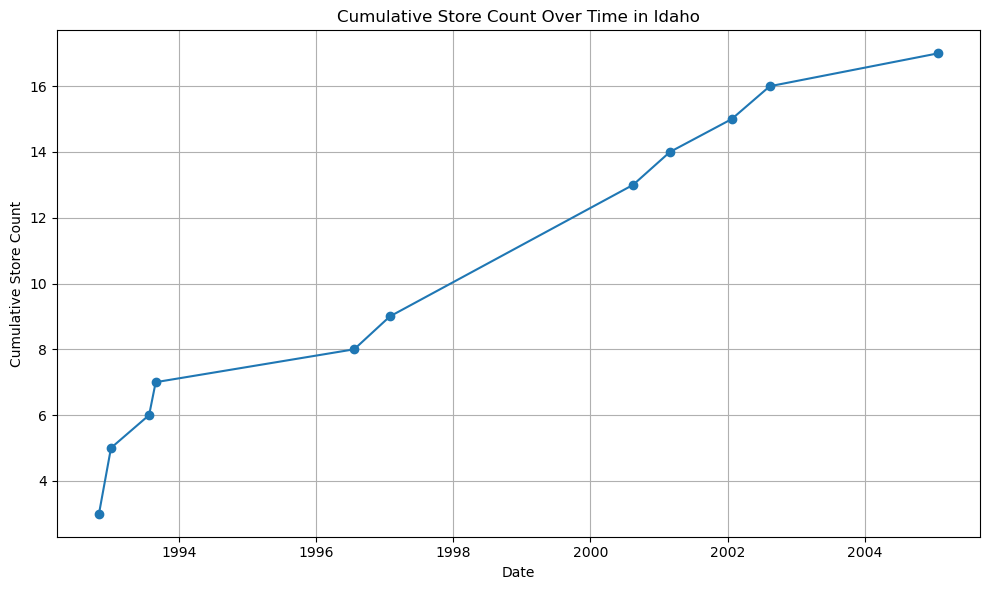

In [9]:
# Your answer to Graded Task 4 here:
import matplotlib.pyplot as plt

# Fetch cumulative store count data for Idaho
state_abbreviation = 'ID'
idaho_data = cumulative_stores_by_date(data, state_abbreviation)

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(idaho_data['OPENDATE'], idaho_data['CumulativeSum'], marker='o', linestyle='-')
plt.title('Cumulative Store Count Over Time in Idaho')
plt.xlabel('Date')
plt.ylabel('Cumulative Store Count')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

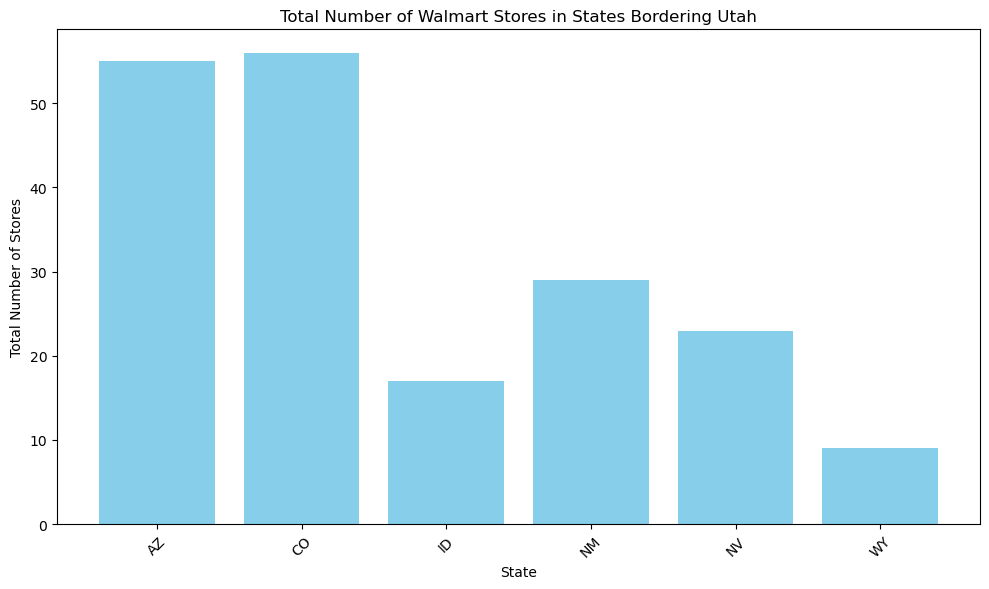

In [11]:
# Your asnwer to Graded Task 5 here:
# Extract states that border Utah
border_states = ['AZ', 'CO', 'ID', 'NV', 'NM', 'WY']

# Filter data for the border states
border_states_data = data[data['STRSTATE'].isin(border_states)]

# Count the total number of Walmart stores per state
total_stores_per_state = border_states_data.groupby('STRSTATE').size().reset_index(name='TotalStores')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(total_stores_per_state['STRSTATE'], total_stores_per_state['TotalStores'], color='skyblue')
plt.title('Total Number of Walmart Stores in States Bordering Utah')
plt.xlabel('State')
plt.ylabel('Total Number of Stores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the plot
plt.show()